# This notebook showcases the easiest ways to work with data in your `Dataset`.

# Also refer to XX and XX for tips on how to create a `Dataset`.

# Reading a specific agent

In [37]:
import trackio as tio
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
import geopandas as gp
import pandas as pd
import numpy as np

# Reading a specific agent

In [3]:
#create the Dataset
ds = tio.read(data_path='example00')

In [6]:
#get agent id
agent_id = ds.agents.index[0]

#get specific agent
agent = ds.get_agent(agent_id)

agent

# Reading a series of agents

In [7]:
#get agent ids
agent_ids = ds.agents.index[:100]

#get agents
agents = ds.get_agents(agent_ids, ncores=4)

len(agents), agents[0]

Getting agents: 100%|██████████| 100/100 [00:00<00:00, 35891.70it/s]


(100, <trackio.Agent.Agent at 0x2135ac7ffa0>)

# Reading a specific track

In [10]:
#get track id
track_id = ds.tracks.index[0]

#get specific agent
track = ds.get_track(track_id)

track.head(5)

,Time,X,Y,Coursing,Speed
0,2021-01-01 02:22:00,-8.245580e+06,4.957761e+06,88.029935,4.871894
1,2021-01-01 02:23:00,-8.245288e+06,4.957771e+06,61.940506,7.370169
2,2021-01-01 02:24:00,-8.244941e+06,4.958251e+06,25.664770,13.950220
3,2021-01-01 02:25:00,-8.244653e+06,4.959294e+06,18.669202,17.790220
4,2021-01-01 02:26:00,-8.244261e+06,4.960271e+06,20.505851,17.913242


# Reading a series of tracks

In [14]:
#get track ids
track_ids = ds.tracks.index[:100]

#get agents
tracks = ds.get_tracks(track_ids, ncores=4)

len(tracks), tracks[0].head(5)

Getting tracks: 100%|██████████| 100/100 [00:00<00:00, 39983.83it/s]


(100,
                  Time             X             Y   Coursing      Speed
 0 2021-01-01 02:22:00 -8.245580e+06  4.957761e+06  88.029935   4.871894
 1 2021-01-01 02:23:00 -8.245288e+06  4.957771e+06  61.940506   7.370169
 2 2021-01-01 02:24:00 -8.244941e+06  4.958251e+06  25.664770  13.950220
 3 2021-01-01 02:25:00 -8.244653e+06  4.959294e+06  18.669202  17.790220
 4 2021-01-01 02:26:00 -8.244261e+06  4.960271e+06  20.505851  17.913242)

# Converting to DataFrame

In [17]:
#convert to dataframe
df = ds.to_df(tracks=track_ids,
              ncores=4)

df.head(5)

Converting tracks to DataFrame: 100%|██████████| 100/100 [00:02<00:00, 47.48it/s]


,Time,X,Y,Coursing,Speed,MMSI,Agent ID,Distance Travelled,Radius of Curvature,Sinuosity,Acceleration,Raster,Characteristic
Vessel_248290000_T0_P0,2021-01-01 00:20:00,-8.237877e+06,4.967661e+06,0.0,0.008203,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P1,2021-01-01 00:21:00,-8.237877e+06,4.967661e+06,0.0,0.008203,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P2,2021-01-01 00:22:00,-8.237877e+06,4.967662e+06,0.0,0.005619,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P3,2021-01-01 00:23:00,-8.237877e+06,4.967662e+06,90.0,0.005574,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_P4,2021-01-01 00:24:00,-8.237877e+06,4.967661e+06,180.0,0.008112,248290000,Vessel_248290000,NaN,NaN,NaN,NaN,NaN,NaN


# Converting to GeoDataFrame

This method has two ways of returning output. It can either return 1 LineString for each track, or N LineStrings for each track with N segments.

Additionally, you can specify a `code` integer value to return only portions of tracks with that `code` value as `True`. For the first output method, this would return 1 MultiLineString.

Converting tracks to GeoDataFrame: 100%|██████████| 100/100 [00:02<00:00, 47.23it/s]


<Axes: >

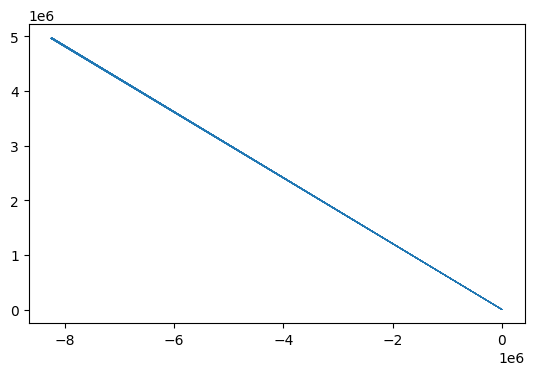

In [21]:
#convert to gdf
gdf = ds.to_gdf(tracks=track_ids, 
                ncores=4)

gdf.plot(linewidth=0.5)

In [22]:
#convert to gdf, segment return mode
gdf = ds.to_gdf(tracks=track_ids, 
                ncores=4,
                segments=True)

gdf.plot(linewidth=0.5, column='Speed')

Converting track segments to GeoDataFrame: 100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


,MMSI,Agent ID,npoints,ntracks,Xmin,Xmax,Ymin,Ymax,Start Time,End Time,...,Sinuosity,Coursing,Speed,Segment ID,geometry,Distance Travelled,Radius of Curvature,Acceleration,Raster,Characteristic
Vessel_248290000_T0_S0,248290000,Vessel_248290000,2,1,-8.237877e+06,-8.237877e+06,4.967661e+06,4.967661e+06,2021-01-01 00:20:00,2021-01-01 00:21:00,...,1.0,0.000000,0.008203,Vessel_248290000_T0_S0,"LINESTRING (-8237877.203 4967660.555, -8237877...",NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_S1,248290000,Vessel_248290000,2,1,-8.237877e+06,-8.237877e+06,4.967661e+06,4.967662e+06,2021-01-01 00:21:00,2021-01-01 00:22:00,...,1.0,0.000000,0.006911,Vessel_248290000_T0_S1,"LINESTRING (-8237877.203 4967661.047, -8237877...",NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_S2,248290000,Vessel_248290000,2,1,-8.237877e+06,-8.237877e+06,4.967662e+06,4.967662e+06,2021-01-01 00:22:00,2021-01-01 00:23:00,...,1.0,45.000000,0.005597,Vessel_248290000_T0_S2,"LINESTRING (-8237877.203 4967661.539, -8237877...",NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_S3,248290000,Vessel_248290000,2,1,-8.237877e+06,-8.237877e+06,4.967661e+06,4.967662e+06,2021-01-01 00:23:00,2021-01-01 00:24:00,...,1.0,135.000000,0.006843,Vessel_248290000_T0_S3,"LINESTRING (-8237877.203 4967661.722, -8237877...",NaN,NaN,NaN,NaN,NaN
Vessel_248290000_T0_S4,248290000,Vessel_248290000,2,1,-8.237877e+06,-8.237877e+06,4.967661e+06,4.967661e+06,2021-01-01 00:24:00,2021-01-01 00:25:00,...,1.0,180.000000,0.007504,Vessel_248290000_T0_S4,"LINESTRING (-8237877.203 4967661.235, -8237877...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vessel_636019179_T0_S1018,636019179,Vessel_636019179,2,1,-8.248589e+06,-8.248588e+06,4.960644e+06,4.960645e+06,2021-01-01 23:52:00,2021-01-01 23:53:00,...,1.0,145.799855,0.030294,Vessel_636019179_T0_S1018,"LINESTRING (-8248588.643 4960645.032, -8248587...",NaN,NaN,NaN,NaN,NaN
Vessel_636019179_T0_S1019,636019179,Vessel_636019179,2,1,-8.248588e+06,-8.248586e+06,4.960642e+06,4.960644e+06,2021-01-01 23:53:00,2021-01-01 23:54:00,...,1.0,97.811706,0.024961,Vessel_636019179_T0_S1019,"LINESTRING (-8248587.529 4960643.565, -8248586...",NaN,NaN,NaN,NaN,NaN
Vessel_636019179_T0_S1020,636019179,Vessel_636019179,2,1,-8.248587e+06,-8.248586e+06,4.960642e+06,4.960642e+06,2021-01-01 23:54:00,2021-01-01 23:55:00,...,1.0,187.811705,0.016698,Vessel_636019179_T0_S1020,"LINESTRING (-8248586.416 4960642.097, -8248586...",NaN,NaN,NaN,NaN,NaN
Vessel_636019179_T0_S1021,636019179,Vessel_636019179,2,1,-8.248587e+06,-8.248587e+06,4.960642e+06,4.960643e+06,2021-01-01 23:55:00,2021-01-01 23:56:00,...,1.0,322.811705,0.017373,Vessel_636019179_T0_S1021,"LINESTRING (-8248586.698 4960642.468, -8248587...",NaN,NaN,NaN,NaN,NaN


# Rasterizing Track Counts

This method uses the GDAL rasterize function to burn track counts into background rasters. A track is counted in a given pixel if any part of that track touches the pixel. The same track crossing over the same pixel can result in multiple counts.

In [27]:
#save the gdf to use it for rasterizing
gdf_file = 'files/gdf.gpkg'
gdf.to_file(gdf_file)

In [26]:
#define blank raster output file
blank_file = 'files/blank.tif'

#get bounds of dataset
x0, y0, x1, y1 = ds.agents.total_bounds

#create blank zero raster
tio.create_blank_raster(blank_file,
                        ds.meta['CRS'],
                        grid={'x0': x0,
                              'y0': y0,
                              'nx': int((x1-x0)/100),
                              'ny': int((y1-y0)/100),
                              'dx': 100,
                              'dy': 100})

Raster created and saved to files/blank.tif!


In [31]:
#define output file
count_file = 'files/track_counts.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, count_file)

Track Counts written to c:\code\trackio\notebooks\files\track_counts.tif


<Axes: >

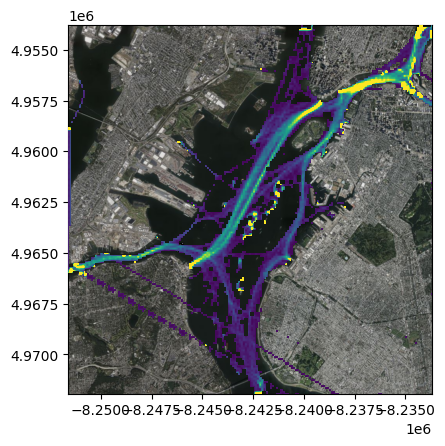

In [83]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
count = rio.open(count_file, 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(count, ax=ax, zorder=10, vmin=0, vmax=50, origin='lower')

# Rasterizing Track Attributes

This can be used to rasterize dynamic attributes (i.e. Speed, Duration, etc.) along tracks into a background raster. This can be useful for making spatial maps of average values, like mean speed. Or, it can be used to estimate the amount of time spent in each pixel.

In [74]:
#define output file
speed_file = 'files/track_speeds.tif'

#rasterize the track counts
tio.rasterize(gdf_file, blank_file, speed_file, attribute='Speed')

Track Speed written to c:\code\trackio\notebooks\files\track_speeds.tif


In [77]:
#make a mean speed raster
count = rio.open(count_file, 'r')
speed = rio.open(speed_file, 'r')
with rio.open('files/mean_speed.tif', 'w', **count.profile) as f:
    f.write(speed.read(1)/count.read(1), 1)

<Axes: >

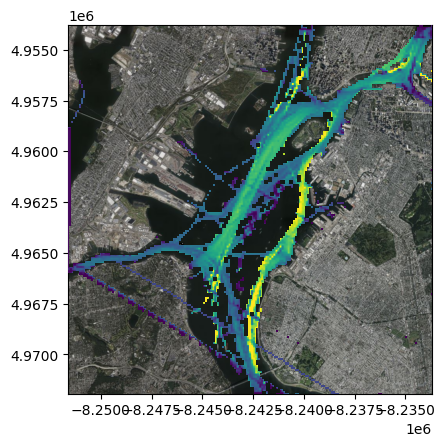

In [85]:
#plot the track counts
bm = rio.open('files/basemap.tif', 'r')
mean_speed = rio.open('files/mean_speed.tif', 'r')

fig,ax=plt.subplots()
show(bm, ax=ax, zorder=0, origin='lower')
show(mean_speed, ax=ax, zorder=10, vmin=0, vmax=15, origin='lower')

# Converting to Dask Bag

This method is used to convert the `Dataset` to a dask bag. Each element in the bag is a `trackio.Agent` object from the `Datset`.

This allows you to do whatever operations you want on the data, while leveraging Dask's parallel optimization capabilities.

In [86]:
#convert to dask bag
bag = ds.to_dask_bag()

In [92]:
#calculate max speed at each track
def grab_max_track_speed(agent):
    out = {}
    for tid in agent.tracks.keys():
        track = agent.tracks[tid]
        track_id = agent.agent_meta['Tracks'][tid]['Track ID']
        max_speed = track['Speed'].max()
        out[track_id] = max_speed
    return out

results = bag.map(grab_max_track_speed).compute()

results[:5]

[{'Vessel_248290000_T0': 8.652333511061574},
 {'Vessel_309987000_T0': 3.4450833800475626},
 {'Vessel_338073000_T0': 6.7817103808222825},
 {'Vessel_338093826_T0': 4.842190014199829},
 {'Vessel_338295000_T0': 4.67471949111503}]